Nama: Azalia Fitriana Bagardini

NRP: 3323600051

Kelas: 3 SDT B

Analisis Pengaruh Karakteristik Rumah dan Lokasi terhadap Harga Rumah di Bandung Raya: Pendekatan Regresi dengan Variabel Dummy

0. Import Library

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan, het_white, acorr_breusch_godfrey
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import acorr_breusch_godfrey
from scipy import stats

1. Load Data

In [2]:
df = pd.read_csv("C:/Users/Azalia Fitriana B/Downloads/clean_df.csv")
df

,Unnamed: 0,Price,Location,Bedroom,Bathroom,Carport,Land,Building,Month,City/Regency,Latitude,Longitude
0,0,1.600000e+09,Padalarang,2,1,1,72,50,8,West Bandung Regency,-6.843600,107.478400
1,1,8.500000e+08,Parongpong,2,1,1,70,80,8,West Bandung Regency,-6.803228,107.581804
2,2,8.750000e+08,Buah Batu,3,2,1,60,70,8,Bandung City,-6.965549,107.637926
3,3,1.750000e+09,Bojongsoang,2,3,1,90,94,8,Bandung Regency,-6.993945,107.643700
4,4,4.900000e+09,Bojongloa Kidul,4,4,0,200,300,8,Bandung City,-6.947036,107.596271
...,...,...,...,...,...,...,...,...,...,...,...,...
32531,53461,4.750000e+08,Rancasari,2,1,1,60,65,10,Bandung City,-6.953536,107.675210
32532,53462,7.000000e+09,Bojongloa Kidul,5,5,2,426,500,10,Bandung City,-6.947036,107.596271
32533,53463,5.500000e+09,Sukasari,5,3,2,427,283,10,Bandung City,-6.863000,107.588100
32534,53464,3.950000e+09,Regol,4,3,2,182,380,10,Bandung City,-6.939713,107.613797


2. EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32536 entries, 0 to 32535
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    32536 non-null  int64  
 1   Price         32536 non-null  float64
 2   Location      32536 non-null  object 
 3   Bedroom       32536 non-null  int64  
 4   Bathroom      32536 non-null  int64  
 5   Carport       32536 non-null  int64  
 6   Land          32536 non-null  int64  
 7   Building      32536 non-null  int64  
 8   Month         32536 non-null  int64  
 9   City/Regency  32536 non-null  object 
 10  Latitude      32536 non-null  float64
 11  Longitude     32536 non-null  float64
dtypes: float64(3), int64(7), object(2)
memory usage: 3.0+ MB



Statistik Deskriptif:
         Unnamed: 0         Price       Bedroom      Bathroom       Carport  \
count  32536.000000  3.253600e+04  32536.000000  32536.000000  32536.000000   
mean   25966.194308  2.554932e+09      3.524158      2.527631      1.052096   
std    15468.621566  1.879994e+09      1.235943      1.074212      0.796888   
min        0.000000  1.020000e+07      1.000000      1.000000      0.000000   
25%    12565.750000  1.200000e+09      3.000000      2.000000      0.000000   
50%    25392.000000  2.000000e+09      3.000000      2.000000      1.000000   
75%    39255.250000  3.365000e+09      4.000000      3.000000      2.000000   
max    53466.000000  9.700000e+09      8.000000      7.000000      3.000000   

               Land      Building         Month      Latitude     Longitude  
count  32536.000000  32536.000000  32536.000000  32536.000000  32536.000000  
mean     181.410929    179.400357      8.988259     -6.923486    107.625894  
std      107.507440    108.5123

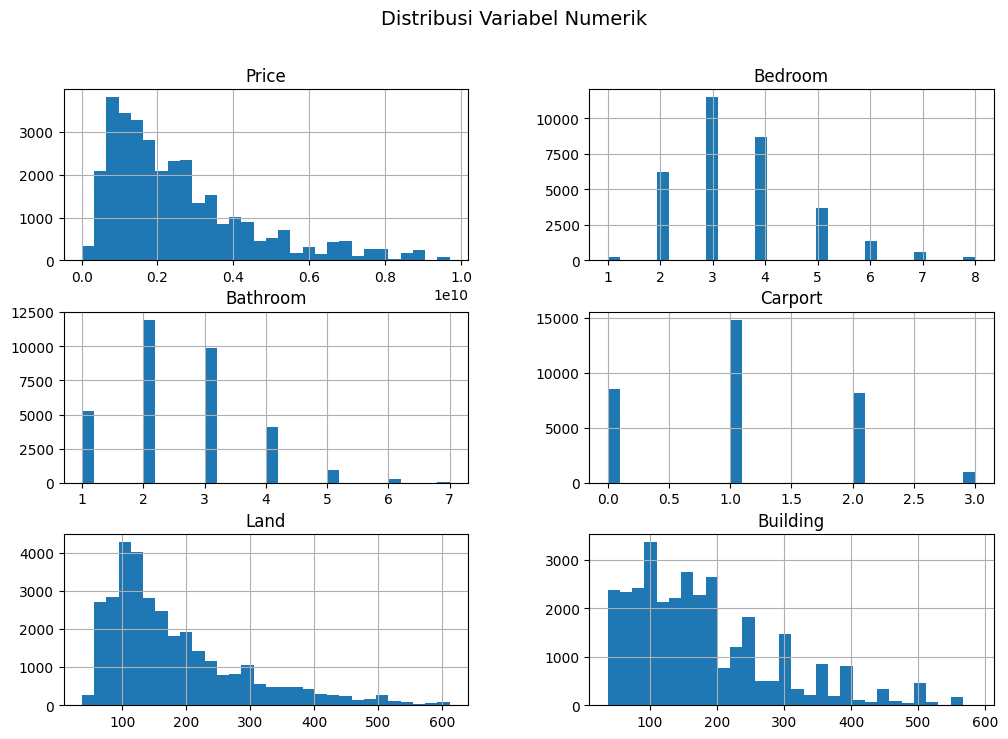

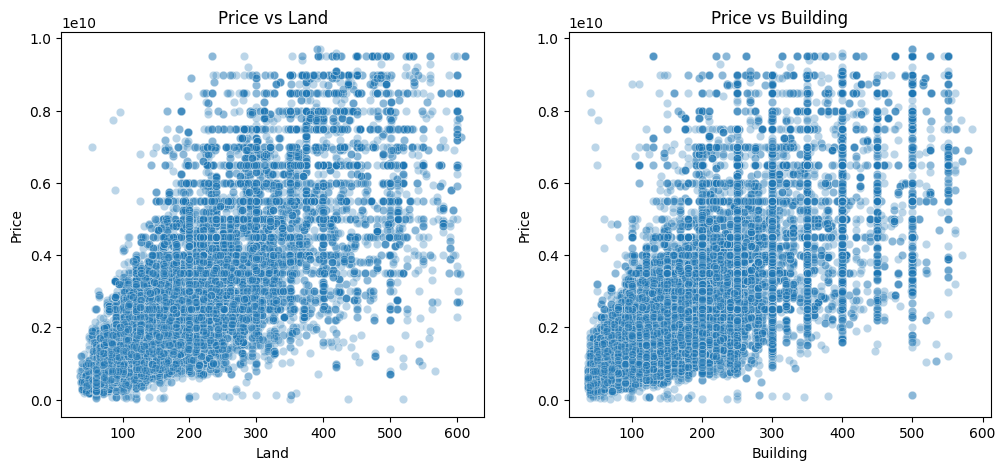

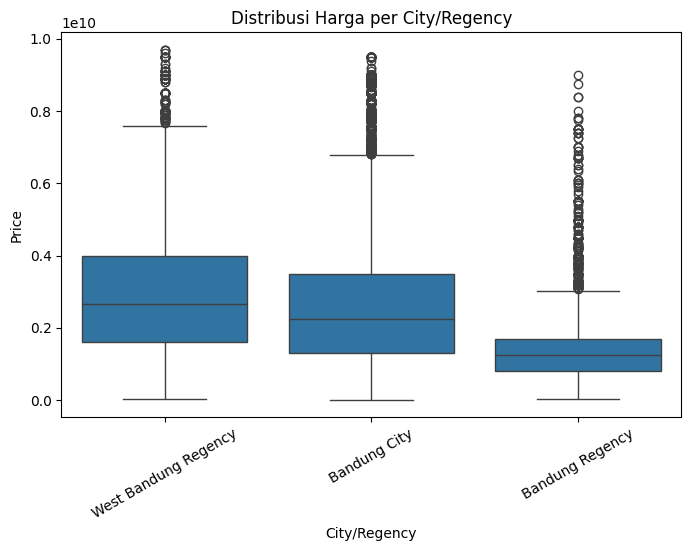

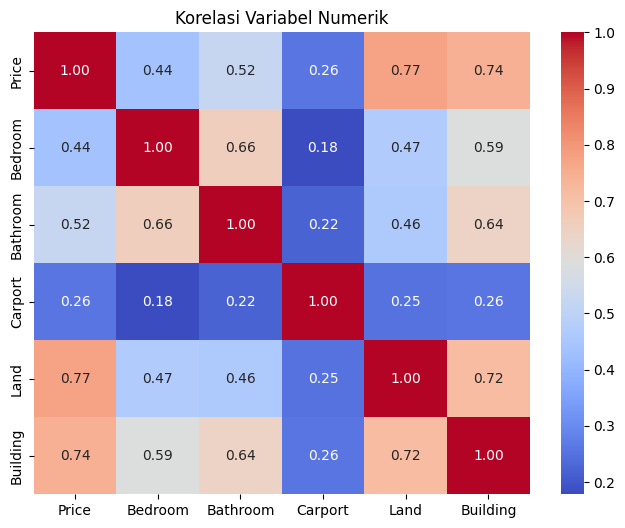

In [4]:
# Statistik deskriptif
print("\nStatistik Deskriptif:")
print(df.describe())

# Cek missing values
print("\nMissing values tiap kolom:")
print(df.isna().sum())

# Distribusi variabel numerik
num_cols = ['Price','Bedroom','Bathroom','Carport','Land','Building']
df[num_cols].hist(bins=30, figsize=(12,8))
plt.suptitle("Distribusi Variabel Numerik", fontsize=14)
plt.show()

# Scatter plot Harga vs Luas Tanah & Bangunan
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.scatterplot(x='Land', y='Price', data=df, alpha=0.3)
plt.title("Price vs Land")

plt.subplot(1,2,2)
sns.scatterplot(x='Building', y='Price', data=df, alpha=0.3)
plt.title("Price vs Building")
plt.show()

# Boxplot Harga berdasarkan City/Regency
plt.figure(figsize=(8,5))
sns.boxplot(x='City/Regency', y='Price', data=df)
plt.xticks(rotation=30)
plt.title("Distribusi Harga per City/Regency")
plt.show()

# Heatmap Korelasi
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Variabel Numerik")
plt.show()

2. Pre-processing

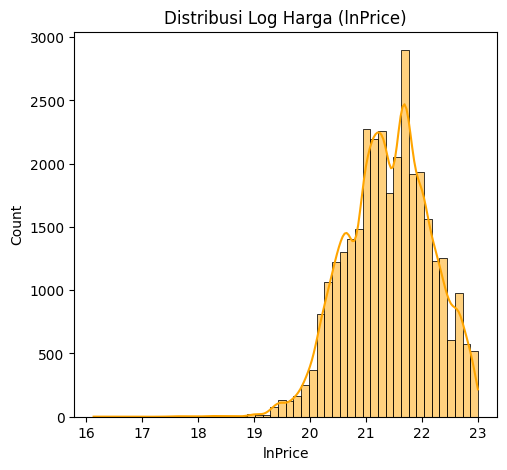

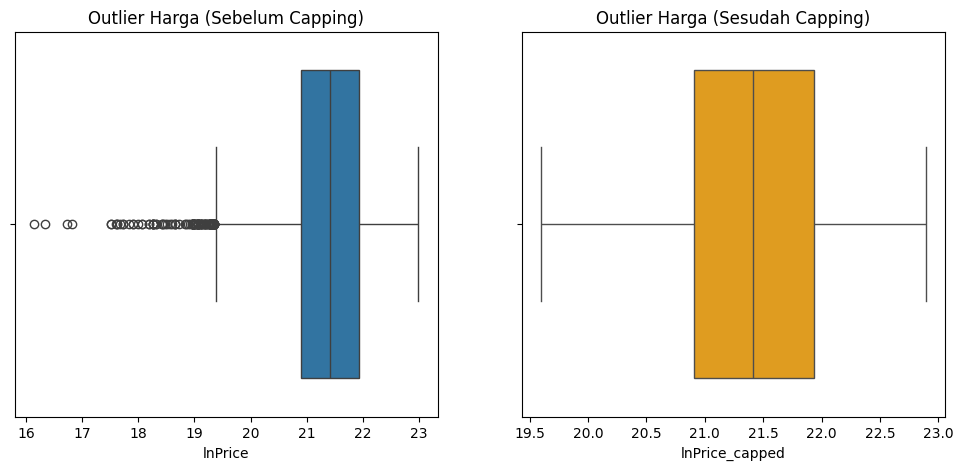

In [5]:
# Dummy variabel
df = pd.get_dummies(df, columns=['City/Regency'], drop_first=True)

# Transformasi Price
df['lnPrice'] = np.log(df['Price'])

plt.figure(figsize=(12,5))
plt.subplot(1,2,2)
sns.histplot(df['lnPrice'], bins=50, kde=True, color='orange')
plt.title("Distribusi Log Harga (lnPrice)")
plt.show()

# Capping Price
lower = df['lnPrice'].quantile(0.01)  # 1% bawah
upper = df['lnPrice'].quantile(0.99)  # 1% atas

# Terapkan capping
df['lnPrice_capped'] = np.where(df['lnPrice'] < lower, lower,
                                np.where(df['lnPrice'] > upper, upper, df['lnPrice']))

# Bandingkan distribusi sebelum vs sesudah
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x=df['lnPrice'])
plt.title("Outlier Harga (Sebelum Capping)")

plt.subplot(1,2,2)
sns.boxplot(x=df['lnPrice_capped'], color='orange')
plt.title("Outlier Harga (Sesudah Capping)")
plt.show()

In [37]:
df

,Unnamed: 0,Price,Location,Bedroom,Bathroom,Carport,Land,Building,Month,Latitude,Longitude,City/Regency_Bandung Regency,City/Regency_West Bandung Regency,lnPrice,lnPrice_capped
0,0,1.600000e+09,Padalarang,2,1,1,72,50,8,-6.843600,107.478400,False,True,21.193269,21.193269
1,1,8.500000e+08,Parongpong,2,1,1,70,80,8,-6.803228,107.581804,False,True,20.560747,20.560747
2,2,8.750000e+08,Buah Batu,3,2,1,60,70,8,-6.965549,107.637926,False,False,20.589734,20.589734
3,3,1.750000e+09,Bojongsoang,2,3,1,90,94,8,-6.993945,107.643700,True,False,21.282882,21.282882
4,4,4.900000e+09,Bojongloa Kidul,4,4,0,200,300,8,-6.947036,107.596271,False,False,22.312501,22.312501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32531,53461,4.750000e+08,Rancasari,2,1,1,60,65,10,-6.953536,107.675210,False,False,19.978825,19.978825
32532,53462,7.000000e+09,Bojongloa Kidul,5,5,2,426,500,10,-6.947036,107.596271,False,False,22.669176,22.669176
32533,53463,5.500000e+09,Sukasari,5,3,2,427,283,10,-6.863000,107.588100,False,False,22.428014,22.428014
32534,53464,3.950000e+09,Regol,4,3,2,182,380,10,-6.939713,107.613797,False,False,22.096981,22.096981


3. OLS

In [6]:
# Model tanpa dummy
X1 = df[['Bedroom','Bathroom','Carport','Land','Building']]
X1 = sm.add_constant(X1)
model1 = sm.OLS(df['lnPrice'], X1).fit()

print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                lnPrice   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                 1.139e+04
Date:                Tue, 30 Sep 2025   Prob (F-statistic):               0.00
Time:                        22:52:05   Log-Likelihood:                -20328.
No. Observations:               32536   AIC:                         4.067e+04
Df Residuals:                   32530   BIC:                         4.072e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.1667      0.008   2485.279      0.0

In [9]:
# Model dengan dummy
X2 = df[['Bedroom','Bathroom','Carport','Land','Building',
         'City/Regency_Bandung Regency','City/Regency_West Bandung Regency']]
X2 = sm.add_constant(X2)
X2 = X2.astype(float)
model2 = sm.OLS(df['lnPrice'], X2).fit()

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                lnPrice   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     9004.
Date:                Tue, 30 Sep 2025   Prob (F-statistic):               0.00
Time:                        22:56:49   Log-Likelihood:                -19261.
No. Observations:               32536   AIC:                         3.854e+04
Df Residuals:                   32528   BIC:                         3.860e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

4. Heteroskedastisitas

Breusch-Pagan p-value: 3.2440166950043617e-22


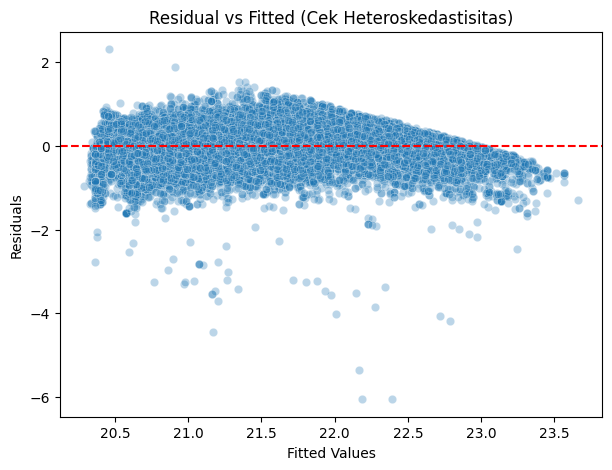

In [38]:
#Uji heteroskedastisitas
resid = model2.resid
fitted = model2.fittedvalues

bp = het_breuschpagan(resid, model2.model.exog)
print("Breusch-Pagan p-value:", bp[1])

plt.figure(figsize=(7,5))
sns.scatterplot(x=fitted, y=resid, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual vs Fitted (Cek Heteroskedastisitas)")
plt.show()

In [ ]:
# Estimasi fungsi varians

eps2 = resid**2
eps2 = eps2 + 1e-12
ln_eps2 = np.log(eps2)
ln_fitted = np.log(fitted.clip(lower=1e-8))

Z = sm.add_constant(pd.DataFrame({'ln_fitted': ln_fitted}))
var_model = sm.OLS(ln_eps2, Z).fit()
print("\nVariance function (log) summary:")
print(var_model.summary())

ln_var_hat = var_model.predict(Z)
var_hat = np.exp(ln_var_hat)

print("var_hat min/max:", var_hat.min(), var_hat.max())


Variance function (log) summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     38.34
Date:                Tue, 30 Sep 2025   Prob (F-statistic):           6.02e-10
Time:                        23:25:12   Log-Likelihood:                -70919.
No. Observations:               32536   AIC:                         1.418e+05
Df Residuals:                   32534   BIC:                         1.419e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0

In [ ]:
# Membuat bobot & fit WLS
# bobot = 1/var_hat
weights = 1.0 / var_hat

wls_model = sm.WLS(df['lnPrice'], X2, weights=weights).fit()
print("\nWLS summary:")
print(wls_model.summary())


WLS summary:
                            WLS Regression Results                            
Dep. Variable:                lnPrice   R-squared:                       0.661
Model:                            WLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     9077.
Date:                Tue, 30 Sep 2025   Prob (F-statistic):               0.00
Time:                        23:26:32   Log-Likelihood:                -19322.
No. Observations:               32536   AIC:                         3.866e+04
Df Residuals:                   32528   BIC:                         3.873e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [ ]:
# Uji ulang heteroskedastisitas pada residual WLS
wls_resid = wls_model.resid
bp_wls = het_breuschpagan(wls_resid, wls_model.model.exog)
print("BP p-value after WLS:", bp_wls[1])

BP p-value after WLS: 1.8068874372945055e-22


In [ ]:
# Model OLS dengan robust SE
model_se = sm.OLS(df['lnPrice'], X2).fit(cov_type='HC3')

print(model_se.summary())


                            OLS Regression Results                            
Dep. Variable:                lnPrice   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     7171.
Date:                Tue, 30 Sep 2025   Prob (F-statistic):               0.00
Time:                        23:31:36   Log-Likelihood:                -19261.
No. Observations:               32536   AIC:                         3.854e+04
Df Residuals:                   32528   BIC:                         3.860e+04
Df Model:                           7                                         
Covariance Type:                  HC3                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 

In [23]:
se_resid = model_se.resid
bp_se = het_breuschpagan(se_resid, model_se.model.exog)
print("BP p-value after robust SE:", bp_se[1])

BP p-value after robust SE: 3.2440166950043617e-22


5. Multikolinearitas

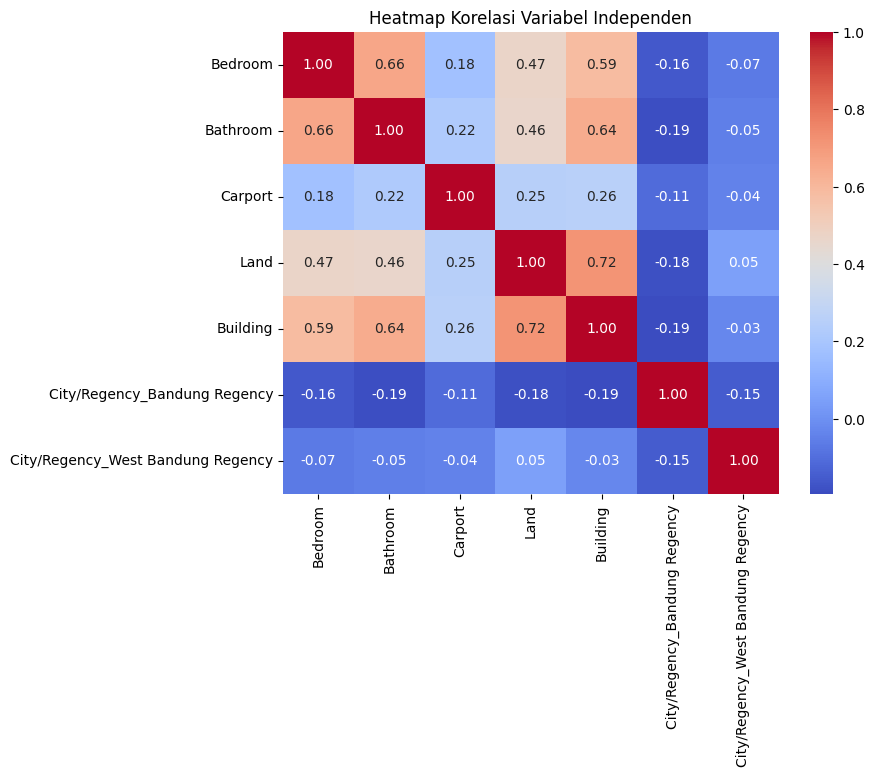

                             feature        VIF
0                              const  12.033612
1                            Bedroom   1.947523
2                           Bathroom   2.175662
3                            Carport   1.093496
4                               Land   2.124152
5                           Building   2.855583
6       City/Regency_Bandung Regency   1.081963
7  City/Regency_West Bandung Regency   1.044671


In [ ]:
corr = X2.drop(columns='const').corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Heatmap Korelasi Variabel Independen")
plt.show()

vif_data = pd.DataFrame()
vif_data['feature'] = X2.columns
vif_data['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
print(vif_data)

6. Autokorelasi

Durbin-Watson: 1.8790122794714235
BG pvalue: 1.0792088603407203e-47


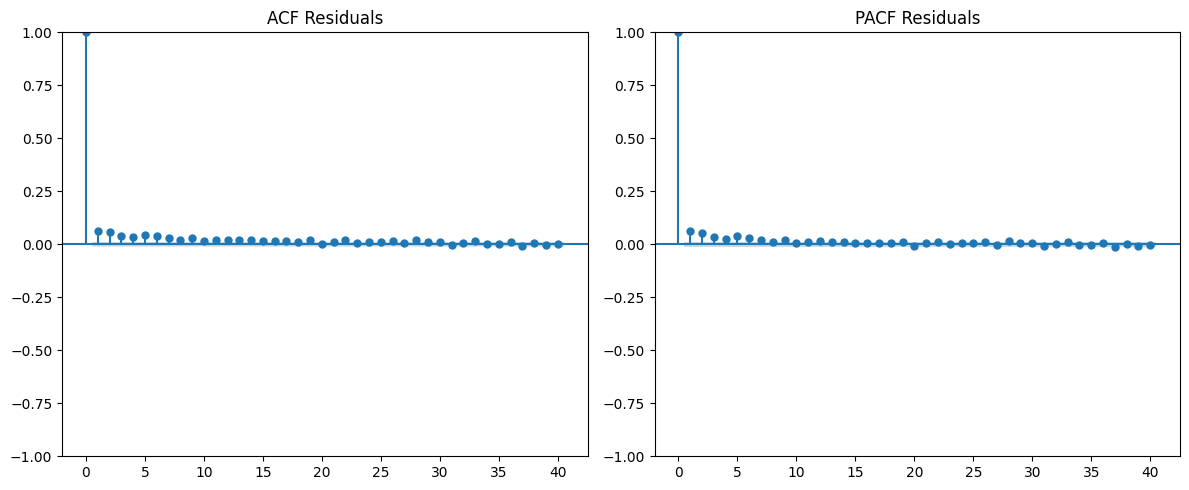

In [36]:
print('Durbin-Watson:', durbin_watson(se_resid))
bg = acorr_breusch_godfrey(model_se, nlags=2)
print('BG pvalue:', bg[1])

# 1. Plot Autocorrelation Function (ACF)
fig, ax = plt.subplots(1, 2, figsize=(12,5))

sm.graphics.tsa.plot_acf(se_resid, lags=40, ax=ax[0])
ax[0].set_title("ACF Residuals")

# 2. Plot Partial Autocorrelation Function (PACF)
sm.graphics.tsa.plot_pacf(se_resid, lags=40, ax=ax[1])
ax[1].set_title("PACF Residuals")

plt.tight_layout()
plt.show()

7. Normalitas Residual

Jarque-Bera pvalue: 0.0


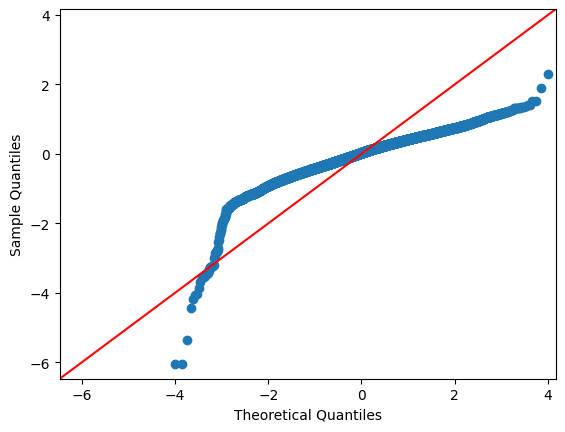

In [30]:
jb = sm.stats.jarque_bera(se_resid)
print('Jarque-Bera pvalue:', jb[1])
sm.qqplot(resid, line='45'); plt.show()